# Laboratorio di Machine Learning

Avremo bisogno di alcune librerie esterne a Python:

- [Random](https://docs.python.org/3/library/random.html): libreria per la generazione di numeri pseudo-casuali
- [Matplotlib](https://matplotlib.org/): libreria per la visualizzazione dei dati
- [Math](https://docs.python.org/3/library/math.html): libreria per le funzioni matematiche

Per installare le librerie esterne a Python, se non le avete già, potete usare il comando `pip` da terminale:

```bash
pip install matplotlib
```

Per verificare che le librerie siano state installate correttamente, potete eseguire il seguente codice:

```python
import random
import math
import matplotlib.pyplot as plt
```

Se non ci sono errori, allora le librerie sono state installate correttamente.

In [68]:
import random
import math
import matplotlib.pyplot as plt

## Outline della lezione

In questa lezione di laboratorio, andremo a completare il seguente codice.

In [83]:
# Punto 2: Algoritmi di apprendimento supervisionato

# Modello lineare per la regressione
def linear_regression(X, y):
    # Implementazione dell'algoritmo di regressione lineare
    # ...
    return model

# Modello lineare per la classificazione


def linear_classification(X, y):
    # Implementazione dell'algoritmo di classificazione lineare
    # ...
    return model

# Punto 3: Tecniche di validazione dei modelli

# Divisione del dataset in train set e test set


def train_test_split(X, y, test_size):
    # Implementazione della divisione del dataset
    # ...
    return X_train, X_test, y_train, y_test

# Leave-One-Out Cross Validation


def leave_one_out_cross_validation(X, y):
    # Implementazione della leave-one-out cross validation
    # ...
    return scores

# K-Fold Cross Validation


def k_fold_cross_validation(X, y, k):
    # Implementazione della k-fold cross validation
    # ...
    return scores

# Metriche di valutazione per la classificazione binaria


def accuracy(y_true, y_pred):
    # Implementazione del calcolo dell'accuratezza
    # ...
    return acc


def precision(y_true, y_pred):
    # Implementazione del calcolo della precisione
    # ...
    return prec


def recall(y_true, y_pred):
    # Implementazione del calcolo della sensibilità (recall)
    # ...
    return rec

# Punto 4: Modelli oltre quelli lineari

# Modelli polinomiali con Support Vector Machine (SVM)


def support_vector_machine(X, y):
    # Implementazione del modello SVM polinomiale
    # ...
    return model

## Modelli lineari per la regressione

Nell'esempio sopra, vengono generati dei dati casuali X e y in cui y è ottenuto come una **linea retta con rumore**. 

L'algoritmo di regressione lineare viene implementato nella funzione `linear_regression` che calcola i coefficienti della retta di regressione. 

Successivamente, il modello viene addestrato utilizzando i dati e infine viene tracciata la retta di regressione nel plot.

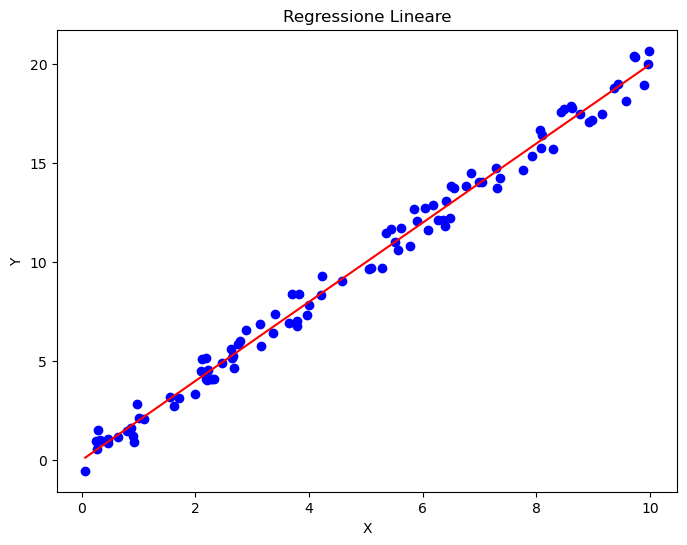

In [84]:
# Generazione di dati casuali
random.seed(42)

num_samples = 100
X = [random.uniform(0, 10) for _ in range(num_samples)]
y = [2 * x + random.uniform(-1, 1) for x in X]

# Implementazione della regressione lineare


def linear_regression(X, y):
    num_samples = len(X)
    sum_x = sum(X)
    sum_y = sum(y)
    sum_xy = sum(x * y for x, y in zip(X, y))
    sum_xx = sum(x * x for x in X)

    slope = (num_samples * sum_xy - sum_x * sum_y) / \
        (num_samples * sum_xx - sum_x * sum_x)
    intercept = (sum_y - slope * sum_x) / num_samples

    return slope, intercept


# Addestramento del modello di regressione lineare
slope, intercept = linear_regression(X, y)

# Plot del dataset e della regressione lineare
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='blue')
plt.plot([min(X), max(X)], [slope * min(X) + intercept,
         slope * max(X) + intercept], color='red')
plt.title('Regressione Lineare')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## Modelli lineari per la classificazione

Nell'implementazione della funzione `logistic_regression`, abbiamo utilizzato la **funzione sigmoide** `sigmoid` per calcolare la trasformazione logistica dei valori `z`. 

Successivamente, abbiamo addestrato il modello utilizzando **il metodo del gradiente discendente** per ottimizzare i pesi e il bias. 

Infine, abbiamo utilizzato i pesi ottimizzati per prevedere le etichette per il set di test.

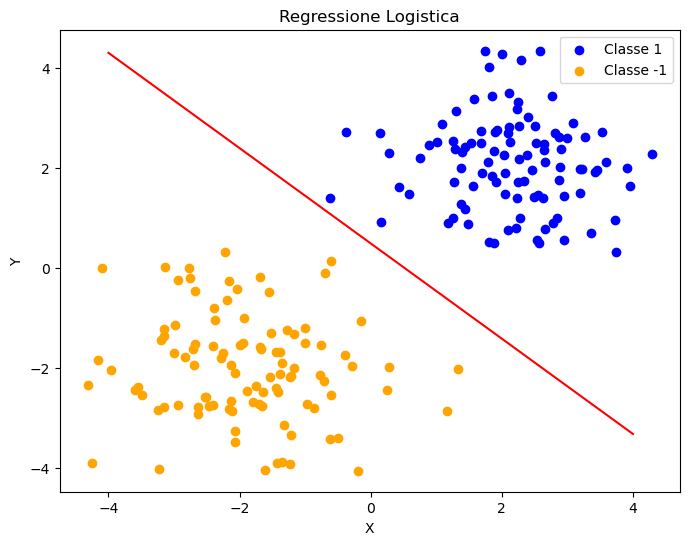

In [71]:
# Generazione di dati casuali
random.seed(42)

num_samples = 100
X1 = [[random.gauss(2, 1), random.gauss(2, 1)] for _ in range(num_samples)]
X2 = [[random.gauss(-2, 1), random.gauss(-2, 1)] for _ in range(num_samples)]
X = X1 + X2
y = [1] * num_samples + [-1] * num_samples

# Implementazione della funzione di regressione logistica


def sigmoid(z):
    return 1 / (1 + math.exp(-z))


def logistic_regression(X, y, learning_rate=0.01, num_iterations=1000):
    num_samples = len(X)
    num_features = len(X[0])
    w = [0] * num_features
    b = 0

    for _ in range(num_iterations):
        dw = [0] * num_features
        db = 0

        for i in range(num_samples):
            # Calcolo del valore predetto
            z = b
            for j in range(num_features):
                z += w[j] * X[i][j]
            y_pred = sigmoid(z)

            # Aggiornamento dei pesi e del bias
            for j in range(num_features):
                dw[j] += (y_pred - y[i]) * X[i][j]
            db += y_pred - y[i]

        # Aggiornamento dei pesi e del bias
        for j in range(num_features):
            w[j] -= learning_rate * dw[j] / num_samples
        b -= learning_rate * db / num_samples

    # Previsione delle etichette
    y_pred = []
    for i in range(num_samples):
        z = b
        for j in range(num_features):
            z += w[j] * X[i][j]
        y_pred.append(1 if sigmoid(z) >= 0.5 else -1)

    return y_pred, w, b

# Addestramento e valutazione del modello di regressione logistica


# Addestramento del modello di regressione logistica
y_pred_logistic, weights, bias = logistic_regression(X, y)

# Plot del dataset e della regressione logistica
plt.figure(figsize=(8, 6))
plt.scatter([x[0] for i, x in enumerate(X) if y[i] == 1], [x[1]
            for i, x in enumerate(X) if y[i] == 1], c='blue', label='Classe 1')
plt.scatter([x[0] for i, x in enumerate(X) if y[i] == -1], [x[1]
            for i, x in enumerate(X) if y[i] == -1], c='orange', label='Classe -1')
plt.plot([-4, 4], [(-bias - weights[0] * (-4)) / weights[1],
         (-bias - weights[0] * 4) / weights[1]], color='red')
plt.title('Regressione Logistica')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

## Tecniche di validazione dei modelli

Supponiamo di avere un dataset fittizio composto da 100 campioni, in cui ogni campione è rappresentato da due feature (variabili) e ha un'etichetta di classe binaria (0 o 1). Vogliamo valutare le prestazioni di un modello di classificazione su questo dataset utilizzando le tecniche di validazione dei modelli.

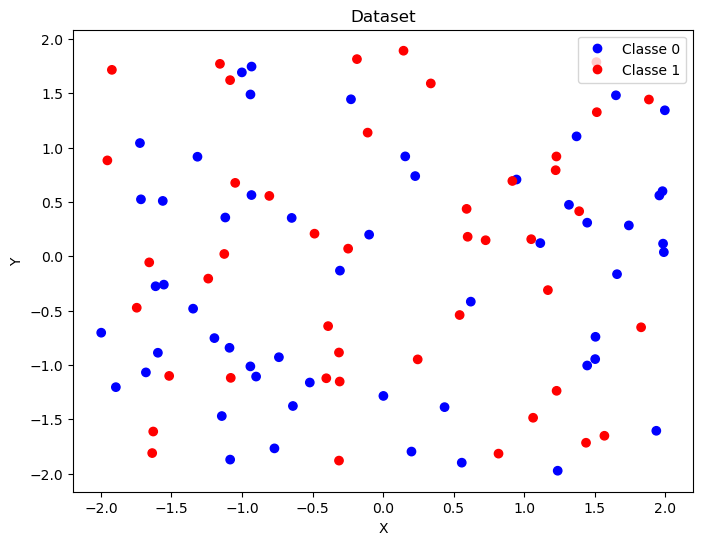

In [72]:
# Generazione di un dataset fittizio
random.seed(42)

num_samples = 100
X = [[random.uniform(-2, 2), random.uniform(-2, 2)]
     for _ in range(num_samples)]
y = [random.choice([0, 1]) for _ in range(num_samples)]

# Plot del dataset
plt.figure(figsize=(8, 6))
colors = ['blue' if label == 0 else 'red' for label in y]
plt.scatter([x[0] for x in X], [x[1] for x in X], c=colors)
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('Y')

# set legend according to color, shape is circular
plt.legend(handles=[plt.Line2D([], [], color='blue', marker='o', linestyle='None'),
                    plt.Line2D([], [], color='red', marker='o', linestyle='None')],
           labels=['Classe 0', 'Classe 1'])


plt.show()

### Divisione del dataset in train set e test set

Iniziamo dividendo il dataset in un train set e un test set. La funzione train_test_split crea una divisione casuale del dataset, assegnando una proporzione test_size di campioni al test set e il resto al train set.

In [73]:
# Divisione del dataset in train set e test set

def train_test_split(X, y, test_size):
    num_samples = len(X)
    num_test_samples = int(num_samples * test_size)
    shuffled_indices = list(range(num_samples))
    random.shuffle(shuffled_indices)

    X_train = [X[i] for i in shuffled_indices[num_test_samples:]]
    y_train = [y[i] for i in shuffled_indices[num_test_samples:]]
    X_test = [X[i] for i in shuffled_indices[:num_test_samples]]
    y_test = [y[i] for i in shuffled_indices[:num_test_samples]]

    return X_train, X_test, y_train, y_test


test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size)

### Leave-One-Out Cross Validation


Successivamente, eseguiamo la Leave-One-Out Cross Validation. 
Questa tecnica addestra il modello su tutti i campioni tranne uno e valuta il modello su quel campione escluso. 
Ripetiamo questa procedura per ogni campione nel dataset, calcolando la valutazione del modello. 
La funzione `leave_one_out_cross_validation` implementa questa tecnica.

In [74]:
# Leave-One-Out Cross Validation
def leave_one_out_cross_validation(X, y):
    num_samples = len(X)
    scores = []

    for i in range(num_samples):
        X_train = X[:i] + X[i+1:]
        y_train = y[:i] + y[i+1:]
        X_test = [X[i]]
        y_test = [y[i]]

        # Addestramento e valutazione del modello

        # ...

        # Sostituisci con la valutazione del modello corretta
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    return scores

Plot della composizione degli split e dei fold.

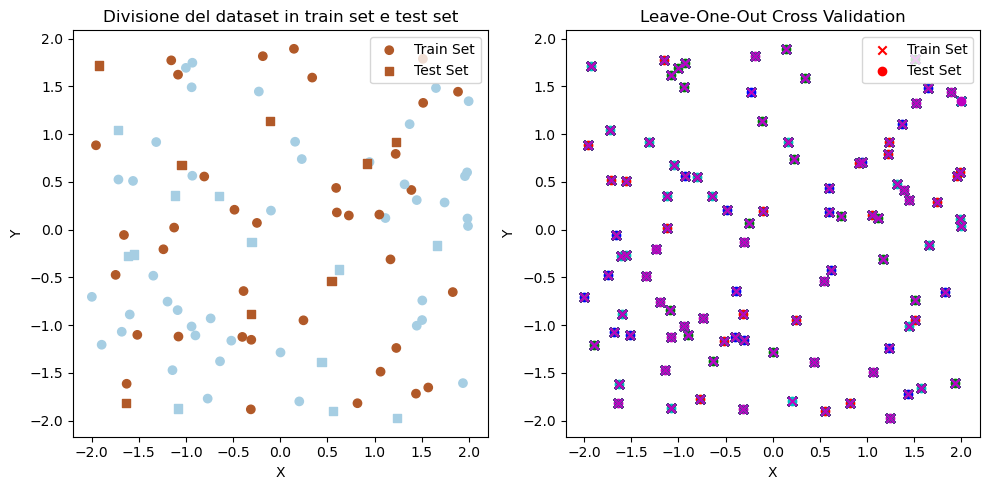

In [75]:
# Divisione del dataset in train set e test set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter([x[0] for x in X_train], [x[1]
            for x in X_train], c=y_train, cmap=plt.cm.Paired)
plt.scatter([x[0] for x in X_test], [x[1]
            for x in X_test], c=y_test, cmap=plt.cm.Paired, marker='s')
plt.title('Divisione del dataset in train set e test set')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Train Set', 'Test Set'])

# Leave-One-Out Cross Validation
plt.subplot(1, 2, 2)
colors = ['r', 'g', 'b', 'c', 'm']
for i in range(num_samples):
    train_indices = list(range(i)) + list(range(i+1, num_samples))
    test_indices = [i]

    X_train = [X[j] for j in train_indices]
    y_train = [y[j] for j in train_indices]
    X_test = [X[j] for j in test_indices]
    y_test = [y[j] for j in test_indices]

    plt.scatter([x[0] for x in X_train], [x[1]
                for x in X_train], c=colors[i % len(colors)], marker='x')
    plt.scatter([x[0] for x in X_test], [x[1]
                for x in X_test], c=colors[i % len(colors)], marker='o')
plt.title('Leave-One-Out Cross Validation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Train Set', 'Test Set'])

plt.tight_layout()
plt.show()

### K-Fold Cross Validation

Infine, utilizziamo la tecnica K-Fold Cross Validation. 

Questa tecnica suddivide il dataset in K fold (in questo caso, impostiamo il parametro k) e addestra il modello su K-1 fold, valutandolo sul fold rimanente. 

Ripetiamo questa procedura K volte, ogni volta utilizzando un fold diverso come set di test. 

La funzione `k_fold_cross_validation` implementa questa tecnica.

In [76]:
# K-Fold Cross Validation

def k_fold_cross_validation(X, y, k):
    num_samples = len(X)
    fold_size = num_samples // k
    scores = []

    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size

        X_train = X[:start] + X[end:]
        y_train = y[:start] + y[end:]
        X_test = X[start:end]
        y_test = y[start:end]

        # Addestramento e valutazione del modello

        # ...

        # Sostituisci con la valutazione del modello corretta
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    return scores

## Metriche per la valutazione di classificatori binari

Supponiamo di avere lo stesso dataset fittizio composto da 100 campioni del precedente esempio, in cui ogni campione è rappresentato da due feature (variabili) e ha un'etichetta di classe binaria (0 o 1). 


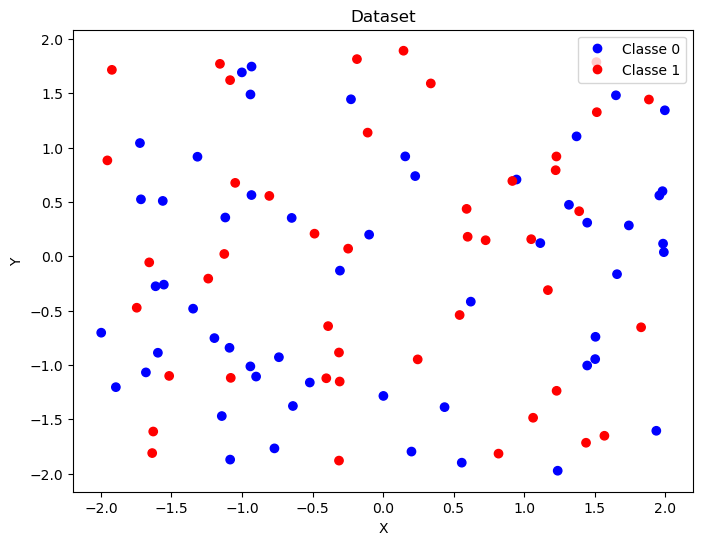

In [77]:
# Generazione di un dataset fittizio
random.seed(42)

num_samples = 100
X = [[random.uniform(-2, 2), random.uniform(-2, 2)]
     for _ in range(num_samples)]
y = [random.choice([0, 1]) for _ in range(num_samples)]

# Plot del dataset
plt.figure(figsize=(8, 6))
colors = ['blue' if label == 0 else 'red' for label in y]
plt.scatter([x[0] for x in X], [x[1] for x in X], c=colors)
plt.title('Dataset')
plt.xlabel('X')
plt.ylabel('Y')

# set legend according to color, shape is circular
plt.legend(handles=[plt.Line2D([], [], color='blue', marker='o', linestyle='None'),
                    plt.Line2D([], [], color='red', marker='o', linestyle='None')],
           labels=['Classe 0', 'Classe 1'])


plt.show()


Vogliamo valutare le prestazioni di un modello di classificazione, in questo caso un modello di regressione logistica, su questo dataset utilizzando le metriche di valutazione per la classificazione binaria.

Successivamente, abbiamo definito tre metriche di valutazione per la classificazione binaria: **accuracy** (accuratezza), **precision** (precisione) e **recall** (sensibilità). 

Queste metriche calcolano rispettivamente l'*accuratezza complessiva*, *la frazione di predizioni positive che sono corrette* e la *frazione di veri positivi individuati correttamente rispetto a tutti i positivi reali*.

In [78]:
# Metriche di valutazione per la classificazione binaria

def accuracy(y_true, y_pred):
    correct = 0
    total = len(y_true)

    for i in range(total):
        if y_true[i] == y_pred[i]:
            correct += 1

    return correct / total


def precision(y_true, y_pred):
    true_positives = 0
    predicted_positives = 0

    for i in range(len(y_true)):
        if y_pred[i] == 1:
            predicted_positives += 1
            if y_true[i] == 1:
                true_positives += 1

    return true_positives / predicted_positives if predicted_positives != 0 else 0


def recall(y_true, y_pred):
    true_positives = 0
    actual_positives = 0

    for i in range(len(y_true)):
        if y_true[i] == 1:
            actual_positives += 1
            if y_pred[i] == 1:
                true_positives += 1

    return true_positives / actual_positives if actual_positives != 0 else 0

Nell'esempio seguiamo la classica routine di un algoritmo di apprendimento automatico:

1. Abbiamo diviso il dataset in un train set e un test set utilizzando una divisione casuale.
2. Abbiamo addestrato il modello di classificazione utilizzando il train set.
3. Abbiamo effettuato le previsioni delle etichette utilizzando il test set.
4. Abbiamo calcolato le metriche di valutazione (accuratezza, precisione, sensibilità) utilizzando le etichette reali del test set e le previsioni effettuate dal modello.
5. Abbiamo visualizzato i risultati delle metriche.

In [82]:
# Divisione del dataset in train set e test set
test_size = 0.2
num_test_samples = int(num_samples * test_size)
indices = list(range(num_samples))
random.shuffle(indices)

X_train = [X[i] for i in indices[num_test_samples:]]
y_train = [y[i] for i in indices[num_test_samples:]]
X_test = [X[i] for i in indices[:num_test_samples]]
y_test = [y[i] for i in indices[:num_test_samples]]

# Addestramento del modello di regressione logistica
_, weights, bias = logistic_regression(X_train, y_train)

# Previsione delle etichette
def predict_logistic_regression(X_test, weights, bias):
    y_pred = []
    for x in X_test:
        z = bias
        for w, feature in zip(weights, x):
            z += w * feature
        y_pred.append(1 if sigmoid(z) >= 0.5 else 0)
    return y_pred

y_pred_logistic = predict_logistic_regression(X_test, weights, bias)

# Calcolo delle metriche di valutazione
acc = accuracy(y_test, y_pred_logistic)
prec = precision(y_test, y_pred_logistic)
rec = recall(y_test, y_pred_logistic)

# Visualizzazione dei risultati
print(f'Accuracy: {acc:.2f}')
print(f'Precision: {prec:.2f}')
print(f'Recall: {rec:.2f}')

Accuracy: 0.60
Precision: 0.50
Recall: 0.38


## Olte i modelli lineari: classificazione con Support Vector Machine

Questa implementazione rappresenta un **modello SVM lineare con l'uso di margini soft** (soft margin) e l'ottimizzazione dei pesi tramite l'algoritmo del gradiente. 

La funzione `train_svm` addestra il modello sui dati di input X e le relative etichette y. 

I parametri C, learning_rate e num_epochs controllano rispettivamente la penalizzazione degli errori, il tasso di apprendimento e il numero di epoche di addestramento.

La funzione `predict_svm` utilizza il modello addestrato per effettuare le previsioni sulle nuove istanze di input X.

In [25]:
import numpy as np

# Funzione di decisione per il modello SVM


def svm_decision_function(X, w, b):
    return np.dot(X, w) + b

# Funzione di addestramento per il modello SVM


def train_svm(X, y, C, learning_rate, num_epochs):
    # convert X in numpy array
    X = np.array(X)
    num_samples, num_features = X.shape

    # Inizializzazione dei pesi e del termine di offset
    w = np.zeros(num_features)
    b = 0

    # Addestramento del modello
    for epoch in range(num_epochs):
        for i in range(num_samples):
            if y[i] * svm_decision_function(X[i], w, b) < 1:
                # Aggiornamento dei pesi per campioni mal classificati
                w = w + learning_rate * (y[i] * X[i] - C * w)
                b = b + learning_rate * y[i]
            else:
                # Aggiornamento dei pesi per campioni correttamente classificati
                w = w + learning_rate * (-C * w)

    return w, b

# Funzione di previsione per il modello SVM


def predict_svm(X, w, b):
    scores = svm_decision_function(X, w, b)
    predictions = np.sign(scores)
    return predictions

### Esempio per SVM

In questo esempio, generiamo casualmente due gruppi di punti bidimensionali (`X1` e `X2`) corrispondenti a due classi diverse. 

Successivamente, combiniamo i due gruppi di punti per ottenere il dataset completo `X`, e assegniamo etichette positive (**classe 1**) ai punti di `X1` e etichette negative (**classe -1**) ai punti di `X2`.


In [27]:
random.seed(42)

num_samples = 100

X1 = [[random.gauss(2, 1), random.gauss(2, 1)] for _ in range(num_samples)]
X2 = [[random.gauss(-2, 1), random.gauss(-2, 1)] for _ in range(num_samples)]
X = X1 + X2

y = [1] * num_samples + [-1] * num_samples

Successivamente, addestriamo il modello SVM utilizzando la funzione `train_svm`. 

In [28]:
# Addestramento del modello SVM
C = 0.01
learning_rate = 0.1
num_epochs = 100

w, b = train_svm(X, y, C, learning_rate, num_epochs)

Il modello addestrato viene quindi utilizzato per effettuare la previsione su un nuovo punto specificato come `new_point` con coordinate (0,0).

In [29]:
# Previsione su un nuovo punto
new_point = np.array([0, 0])
prediction = predict_svm(new_point, w, b)

Infine, visualizziamo i dati di addestramento, la decision boundary calcolata dal modello SVM e il nuovo punto sul grafico.

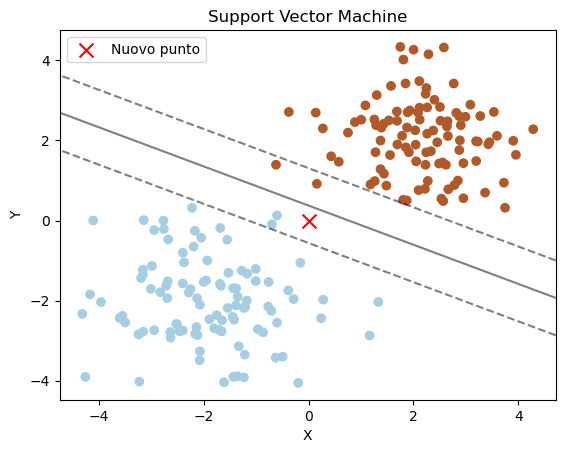

In [30]:
# Plot dei dati e della decision boundary
# convert X to numpy array
X = np.array(X)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creazione della griglia di punti per la decision boundary
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_decision_function(xy, w, b).reshape(XX.shape)

# Plot della decision boundary
ax.contour(XX, YY, Z, colors='k',
           levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(new_point[0], new_point[1], color='red',
           marker='x', s=100, label='Nuovo punto')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Support Vector Machine')
plt.show()

Puoi sperimentare con questo esempio modificando i parametri come C, learning_rate, num_epochs.